# Get started with Qiskit

This page is for anyone that understands the basics of quantum computing and wants to start creating quantum programs using Qiskit. To learn about quantum computing in general, check out IBM's [Basics of quantum information course](https://learning.quantum-computing.ibm.com/course/basics-of-quantum-information).

In this tutorial, you'll create a simple quantum program and run it on a simulator. Before you start, you'll need some way of running Qiskit code. See [Installation](https://qiskit.org/documentation/getting_started.html) to get set up, and make sure to install the extra `qiskit[visualization]` dependencies to use all the features in this tutorial.

## Write a quantum program

The following code cell creates a circuit that produces a _Bell state:_ A specific two-qubit entangled state. For a simple experiment that uses a Bell state to show the effects of entanglement, check out the [CHSH game](https://learning.quantum-computing.ibm.com/course/basics-of-quantum-information/entanglement-in-action#the-chsh-game).

<div class="alert alert-block alert-info">
Qiskit uses little-endian bit ordering; that is, the bit (or qubit) with index 0 is the least significant qubit. This differs across authors and software packages, so watch out!
</div>

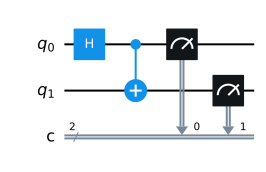

In [1]:
from qiskit import QuantumCircuit

# Create a new circuit with two qubits (first argument) and two classical
# bits (second argument)
qc = QuantumCircuit(2, 2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Measure qubit 0 to cbit 0, and qubit 1 to cbit 1
qc.measure(0, 0)
qc.measure(1, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

## Run your quantum program

Quantum circuits can produce random results, so you'll often want to collect a sample of the outputs by running the circuit many times. You can sample a circuit's output using the `Sampler` class. 

In [2]:
from qiskit.primitives import Sampler

# Create a Sampler object
sampler = Sampler()

# Submit the circuit to the sampler
job = sampler.run(qc)

# Once the job is complete, get the result
job.result()

SamplerResult(quasi_dists=[{0: 0.4999999999999999, 3: 0.4999999999999999}], metadata=[{}])

The `quasi_dists` property is a list of sampled distributions for each circuit we provided. Since we only provided one circuit, the list only has one element.

The distributions are dictionary-like objects. Each key is a measured output, and its value is the fraction of the time that output was measured. In this case, the circuit measurement output was `0` ~50% of the time, and `3` (which is `11` in binary) ~50% of the time.

### Plotting results

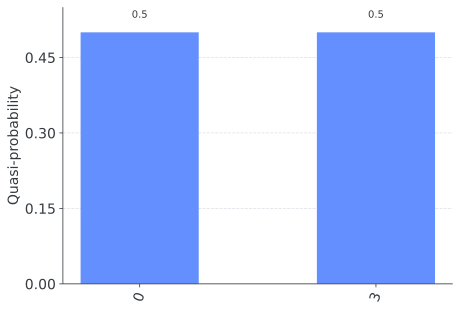

In [3]:
from qiskit.visualization import plot_histogram

plot_histogram(
    job.result().quasi_dists
)

And that's it! You now have everything you need to start writing and running quantum programs.

## Connect with the Qiskit community

Need help or advice? Chat with other Qiskit users and experts on the [Qiskit Slack workspace](https://qisk.it/join-slack).

In [4]:
import qiskit.tools.jupyter
%qiskit_version_table